In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(genomation)
library(GenomicRanges)
library(Matrix)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDupl

In [2]:
obj.seurat = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/5.merge_peaks_from_5_super_groups.240524/obj.seurat.rds")

In [9]:
list.rna_detected_percent.5 = lapply(c("B","Myeloid","T","Erythroid","Dendritic"),
                                     function(cell_type) {
                                         matrix.rna = obj.seurat@assays$RNA$counts[,!is.na(obj.seurat$cell_type.merged) &
                                                                                   obj.seurat$cell_type.merged == cell_type]
                                         rna_detected_percent = rowSums(matrix.rna) / ncol(matrix.rna)
                                         rna_detected_percent
                                     })

In [16]:
df.rna_detected_percent.5 = do.call(cbind,list.rna_detected_percent.5)
df.rna_detected_percent.5 = as.data.frame(df.rna_detected_percent.5)
colnames(df.rna_detected_percent.5) = c("B","Myeloid","T","Erythroid","Dendritic")

In [17]:
df.rna_detected_percent.5

,B,Myeloid,T,Erythroid,Dendritic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L2,0.0000000000,0.000000e+00,8.879023e-05,0.0003334815,0.000000000
DDX11L1,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000
WASH7P,0.0008203445,1.993166e-03,2.574917e-03,0.0035571365,0.004878049
MIR6859-1,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000
MIR1302-2HG,0.0000000000,0.000000e+00,0.000000e+00,0.0002223210,0.000000000
MIR1302-2,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000
FAM138A,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000
OR4G4P,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000
ENSG00000290826,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0.000000000


In [18]:
cell_types.22 = unique(obj.seurat$cell_type.rename)
length(cell_types.22)
cell_types.22

[1] 22

[1] "Naive_CD20_pos_B"    "CD14_pos_Mono"       "CD8_pos_T"          
 [4] "CD16_pos_Mono"       "B1_B"                "Lymph_prog"         
 [7] "CD4_pos_T_naive"     "CD4_pos_T_activated" "Erythroblast"       
[10] "NK"                  "Transitional_B"      "Normoblast"         
[13] "ILC"                 "G_M_prog"            "MK_E_prog"          
[16] "HSC"                 "pDC"                 "ID2_hi_myeloid_prog"
[19] "Proerythroblast"     "Plasma_cell"         "cDC2"               
[22] "CD8_pos_T_naive"

In [19]:
list.rna_detected_percent.22 = lapply(cell_types.22,
                                     function(cell_type) {
                                         matrix.rna = obj.seurat@assays$RNA$counts[,obj.seurat$cell_type.rename == cell_type]
                                         rna_detected_percent = rowSums(matrix.rna) / ncol(matrix.rna)
                                         rna_detected_percent
                                     })

In [20]:
df.rna_detected_percent.22 = do.call(cbind,list.rna_detected_percent.22)
df.rna_detected_percent.22 = as.data.frame(df.rna_detected_percent.22)
colnames(df.rna_detected_percent.22) = cell_types.22

In [21]:
df.rna_detected_percent.22

,Naive_CD20_pos_B,CD14_pos_Mono,CD8_pos_T,CD16_pos_Mono,B1_B,Lymph_prog,CD4_pos_T_naive,CD4_pos_T_activated,Erythroblast,NK,⋯,ILC,G_M_prog,MK_E_prog,HSC,pDC,ID2_hi_myeloid_prog,Proerythroblast,Plasma_cell,cDC2,CD8_pos_T_naive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L2,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0002273761,0.0001809627,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.001131222,0.0000000000,0.000000000,0.000000000,0.0013043478,0.000000000,0.000000000,0.0000000000
DDX11L1,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
WASH7P,0.0005938242,0.0018445080,1.639486e-03,0.0026399155,0.002645503,0.0016863406,0.0036380173,0.0038002172,0.0038649308,0.0015875307,⋯,0.000000000,0.0024937656,0.003393665,0.0027985075,0.003358522,0.000000000,0.0052173913,0.002638522,0.006984866,0.0019762846
MIR6859-1,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
MIR1302-2HG,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0002034174,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
MIR1302-2,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
FAM138A,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
OR4G4P,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000
ENSG00000290826,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000


In [55]:
table(df.rna_detected_percent.22[,1] > 0.01)


FALSE  TRUE 
51664 11093 

In [56]:
table(df.rna_detected_percent.5[,1] > 0.01)


FALSE  TRUE 
51148 11609 

In [57]:
df.rna_detected_percent.5.bi = df.rna_detected_percent.5 > 0.01
df.rna_detected_percent.5.bi

,B,Myeloid,T,Erythroid,Dendritic
DDX11L2,FALSE,FALSE,FALSE,FALSE,FALSE
DDX11L1,FALSE,FALSE,FALSE,FALSE,FALSE
WASH7P,FALSE,FALSE,FALSE,FALSE,FALSE
MIR6859-1,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2HG,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G4P,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000290826,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G11P,FALSE,FALSE,FALSE,FALSE,FALSE


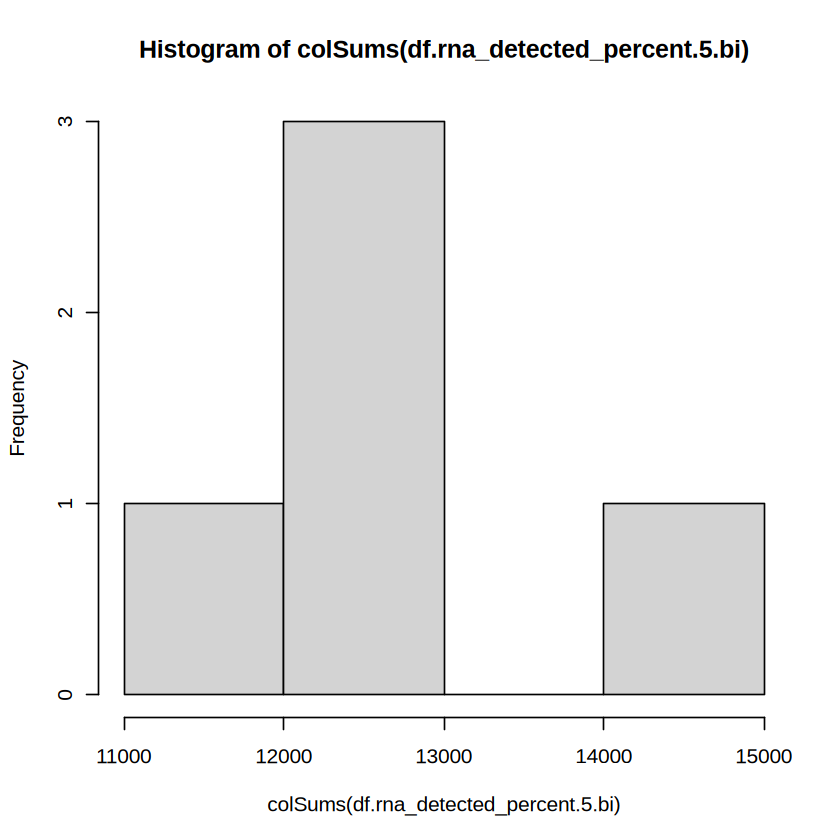

In [62]:
hist(colSums(df.rna_detected_percent.5.bi))

In [63]:
df.rna_detected_percent.22.bi = df.rna_detected_percent.22 > 0.01
df.rna_detected_percent.22.bi

,Naive_CD20_pos_B,CD14_pos_Mono,CD8_pos_T,CD16_pos_Mono,B1_B,Lymph_prog,CD4_pos_T_naive,CD4_pos_T_activated,Erythroblast,NK,⋯,ILC,G_M_prog,MK_E_prog,HSC,pDC,ID2_hi_myeloid_prog,Proerythroblast,Plasma_cell,cDC2,CD8_pos_T_naive
DDX11L2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
DDX11L1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
WASH7P,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MIR6859-1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2HG,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G4P,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000290826,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G11P,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


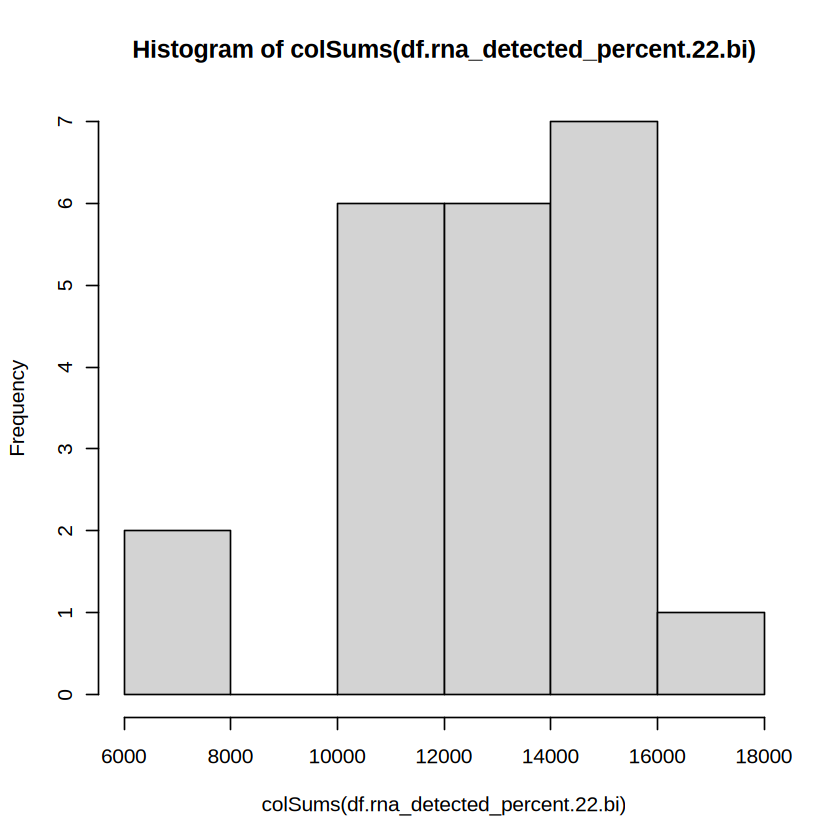

In [64]:
hist(colSums(df.rna_detected_percent.22.bi))

In [65]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614",recursive = T)

Warning message in dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614", :
“'/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614' already exists”


In [66]:
write.csv(df.rna_detected_percent.5,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/df.rna_detected_percent.5.csv")

In [67]:
write.csv(df.rna_detected_percent.5.bi,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/df.rna_detected_percent.5.bi.csv")

In [68]:
write.csv(df.rna_detected_percent.22,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/df.rna_detected_percent.22.csv")

In [69]:
write.csv(df.rna_detected_percent.22.bi,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/df.rna_detected_percent.22.bi.csv")

In [70]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/peaks_BMMC5",recursive = T)

In [84]:
for (cell_type in c("B","Myeloid","T","Erythroid","Dendritic")) {
    bed.peaks = readGeneric(paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/test/results_BMMC5/",
                                  cell_type,
                                  "/Kendall/Pairs.tsv.gz",
                                  sep = ""),
                            header = T)
    bed.peaks = reduce(bed.peaks)

    write.table(as.data.frame(bed.peaks)[,1:3],
            paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/peaks_BMMC5/",
                  cell_type,
                  ".bed",
                  sep = ""),
            sep = "\t",
            row.names = F,
            col.names = F,
            quote = F)
}

In [85]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/peaks_BMMC22",recursive = T)

In [86]:
for (cell_type in cell_types.22) {
    bed.peaks = readGeneric(paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/test/results_BMMC/",
                                  cell_type,
                                  "/Kendall/Pairs.tsv.gz",
                                  sep = ""),
                            header = T)
    bed.peaks = reduce(bed.peaks)

    write.table(as.data.frame(bed.peaks)[,1:3],
            paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/6.define_detected_gene_peak.240614/peaks_BMMC22/",
                  cell_type,
                  ".bed",
                  sep = ""),
            sep = "\t",
            row.names = F,
            col.names = F,
            quote = F)
}

In [87]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.5.1        Matrix_1.6-5         GenomicRanges_1.54.1
 [4] GenomeInfoDb_1.38.1  IRanges_2.36.0       S4Vectors_0.40.2    